In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
#Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-kids-screentime-2025/Indian_Kids_Screen_Time.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/kaggle/input/indian-kids-screentime-2025/Indian_Kids_Screen_Time.csv')

In [5]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [6]:
df.count()

Age                                  9712
Gender                               9712
Avg_Daily_Screen_Time_hr             9712
Primary_Device                       9712
Exceeded_Recommended_Limit           9712
Educational_to_Recreational_Ratio    9712
Health_Impacts                       6494
Urban_or_Rural                       9712
dtype: int64

## Data Cleaning 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [8]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [9]:
df["Health_Impacts"].head()

0    Poor Sleep, Eye Strain
1                Poor Sleep
2                Poor Sleep
3                       NaN
4       Poor Sleep, Anxiety
Name: Health_Impacts, dtype: object

> It's Multi Labeled Column

In [10]:
df["Health_Impacts"].isnull().sum()

3218

>  **Column Health_Impacts have 3218 missing values>** 

In [11]:
df['Health_Impacts'] = df['Health_Impacts'].fillna("No Impact")

In [12]:
df.isnull().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

In [13]:
df.count()

Age                                  9712
Gender                               9712
Avg_Daily_Screen_Time_hr             9712
Primary_Device                       9712
Exceeded_Recommended_Limit           9712
Educational_to_Recreational_Ratio    9712
Health_Impacts                       9712
Urban_or_Rural                       9712
dtype: int64

In [14]:
df["Health_Impacts"]

0                Poor Sleep, Eye Strain
1                            Poor Sleep
2                            Poor Sleep
3                             No Impact
4                   Poor Sleep, Anxiety
                     ...               
9707                         Poor Sleep
9708                         Poor Sleep
9709    Poor Sleep, Eye Strain, Anxiety
9710                         Poor Sleep
9711                            Anxiety
Name: Health_Impacts, Length: 9712, dtype: object

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Avg_Daily_Screen_Time_hr', ylabel='Count'>

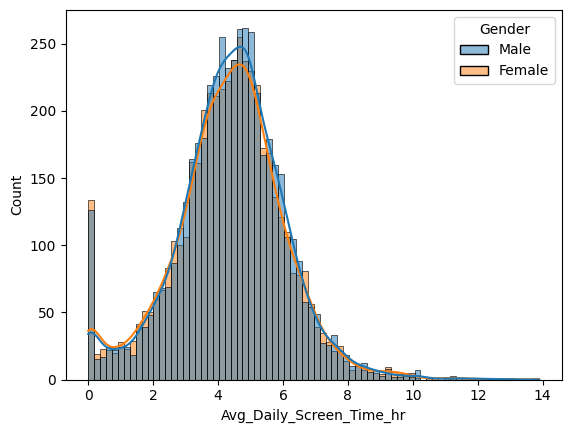

In [15]:
sns.histplot(data=df, x='Avg_Daily_Screen_Time_hr', hue='Gender', kde=True)

<Axes: xlabel='Primary_Device', ylabel='Avg_Daily_Screen_Time_hr'>

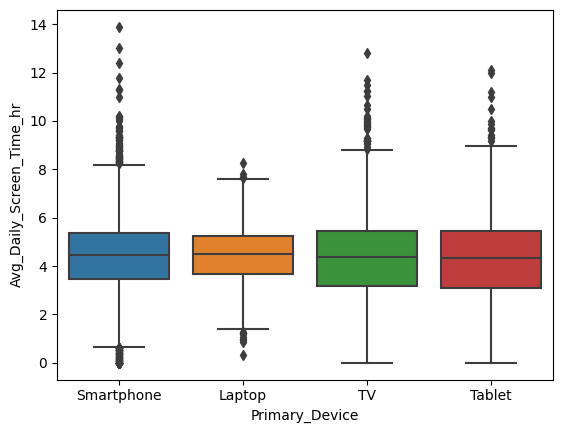

In [16]:
sns.boxplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr')


<Axes: xlabel='Exceeded_Recommended_Limit', ylabel='count'>

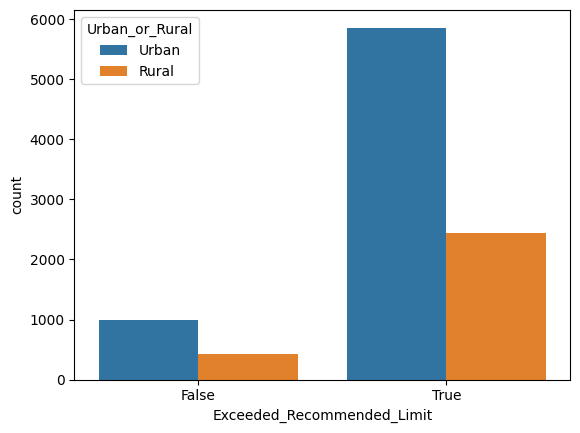

In [17]:
sns.countplot(data=df, x='Exceeded_Recommended_Limit', hue='Urban_or_Rural')

<Axes: xlabel='Gender', ylabel='Educational_to_Recreational_Ratio'>

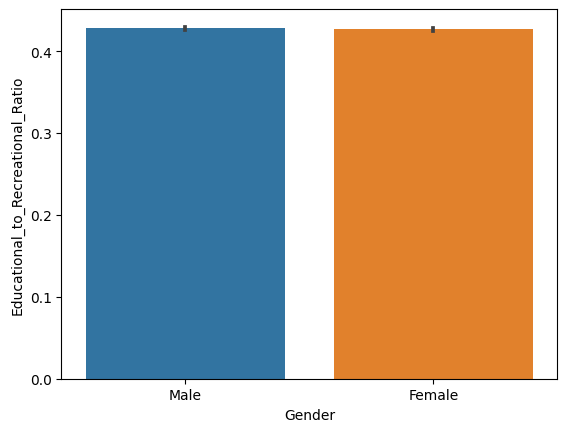

In [18]:
sns.barplot(data=df, x='Gender', y='Educational_to_Recreational_Ratio')

<Axes: >

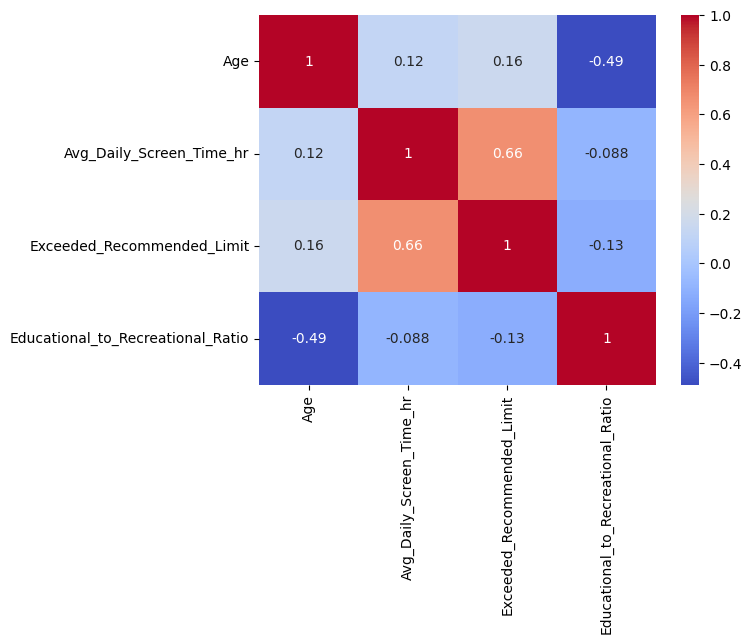

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


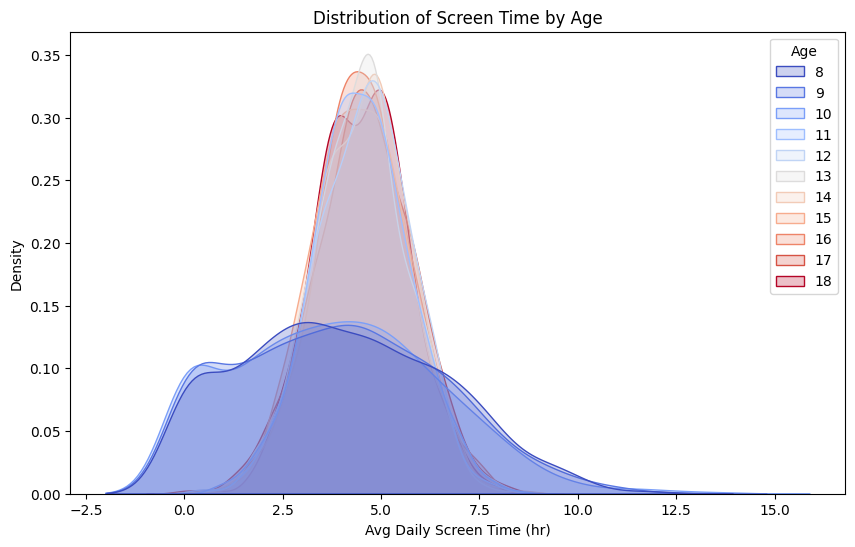

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Avg_Daily_Screen_Time_hr', hue='Age', palette='coolwarm', fill=True, common_norm=False)
plt.title('Distribution of Screen Time by Age')
plt.xlabel('Avg Daily Screen Time (hr)')
plt.ylabel('Density')
plt.show()

In [21]:
impacts = ['Poor Sleep', 'Eye Strain', 'Anxiety']

for impact in impacts:
    df[impact] = df['Health_Impacts'].str.contains(impact)


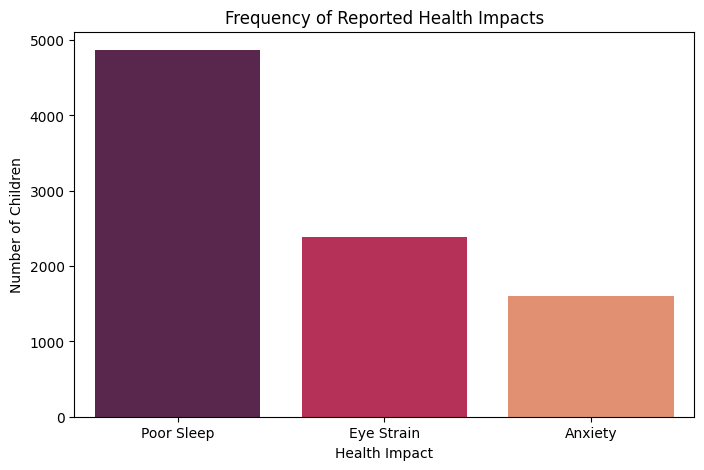

In [22]:
health_issues = ['Poor Sleep', 'Eye Strain', 'Anxiety']

# Count total for each impact
health_counts = df[health_issues].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=health_counts.index, y=health_counts.values, palette='rocket')
plt.title('Frequency of Reported Health Impacts')
plt.ylabel('Number of Children')
plt.xlabel('Health Impact')
plt.show()

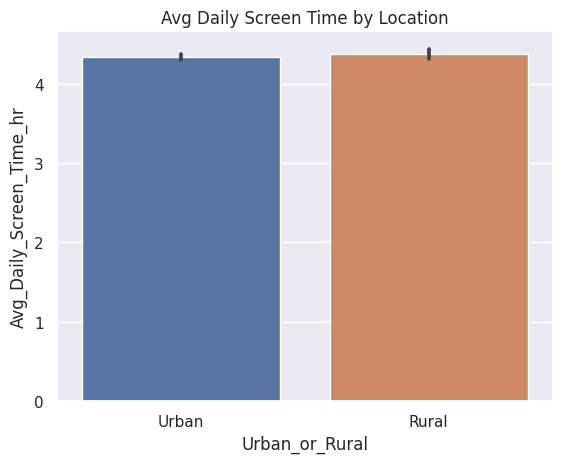

In [23]:
sns.set_theme()
sns.barplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr')
plt.title('Avg Daily Screen Time by Location')
plt.show()

### Avg Daily time by Gender and Urban

In [24]:
df.groupby(['Gender', 'Urban_or_Rural'])['Avg_Daily_Screen_Time_hr'].mean()

Gender  Urban_or_Rural
Female  Rural             4.366440
        Urban             4.310479
Male    Rural             4.380758
        Urban             4.376505
Name: Avg_Daily_Screen_Time_hr, dtype: float64

### Poor Sleep

In [25]:
df[df['Poor Sleep'] == True]['Avg_Daily_Screen_Time_hr'].mean()

4.931329087921117

* Poor sleep patient have 4.93 hr Avg daily screen time.

In [26]:
df[df['Poor Sleep'] == False]['Avg_Daily_Screen_Time_hr'].mean()

3.7714781172584644

* Patient doesnt have poor sleep have 3.77 hr Avg daily screen time

<Axes: ylabel='Avg_Daily_Screen_Time_hr'>

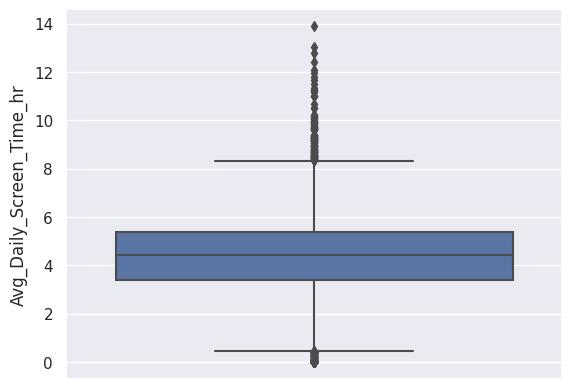

In [27]:
sns.boxplot(data=df, y='Avg_Daily_Screen_Time_hr')


* Graph shows that some childern have 10+ hours of Screen time, more then avg hour.

In [28]:
df[['Poor Sleep', 'Anxiety', 'Eye Strain']].sum()

Poor Sleep    4868
Anxiety       1605
Eye Strain    2382
dtype: int64

* It shows the disease of childerns 

# **Model Trainig** 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Model
from keras.layers import Input, Dense

2025-07-19 15:19:18.888263: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752938359.106073      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752938359.166884      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Preprocessing

In [30]:
# Label Encoding for categorical columns
label_enc = LabelEncoder()
for col in ['Gender', 'Primary_Device', 'Urban_or_Rural']:
    df[col] = label_enc.fit_transform(df[col])

In [31]:
# Define features and target
features = [
    'Age',
    'Gender',
    'Avg_Daily_Screen_Time_hr',
    'Primary_Device',
    'Exceeded_Recommended_Limit',
    'Educational_to_Recreational_Ratio',
    'Urban_or_Rural'
]
target = 'Poor Sleep'

In [32]:
X = df[features]
y = df[target]

## Random Forest Classifier

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [34]:
# Report 
print("\nRandom Forest Classification Report")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report
              precision    recall  f1-score   support

       False       0.66      0.55      0.60       965
        True       0.62      0.72      0.66       978

    accuracy                           0.63      1943
   macro avg       0.64      0.63      0.63      1943
weighted avg       0.64      0.63      0.63      1943



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


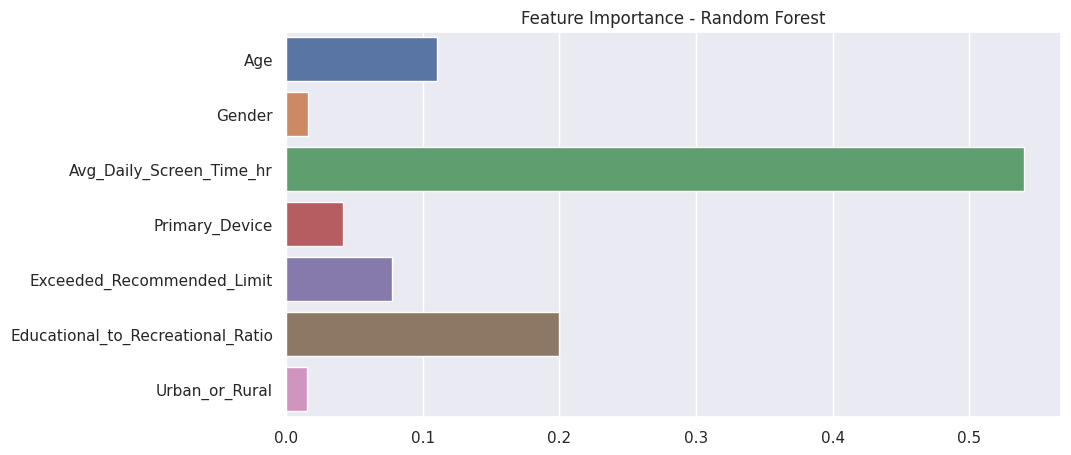

In [35]:
# Feature importance plot
importances = rf.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()

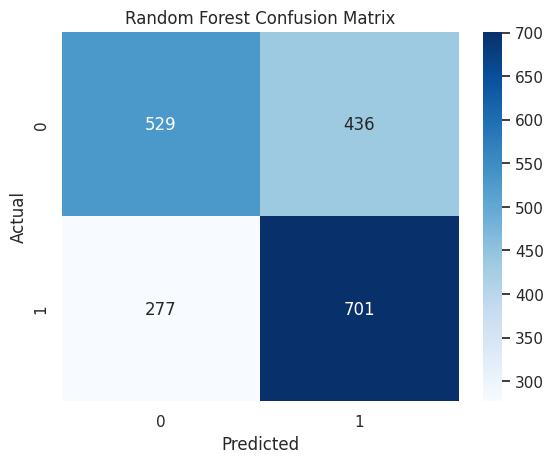

In [36]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [37]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

## XGBoost Classifier

In [38]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [39]:
print("\nXGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report
              precision    recall  f1-score   support

       False       0.66      0.52      0.58       965
        True       0.61      0.74      0.67       978

    accuracy                           0.63      1943
   macro avg       0.63      0.63      0.62      1943
weighted avg       0.63      0.63      0.62      1943



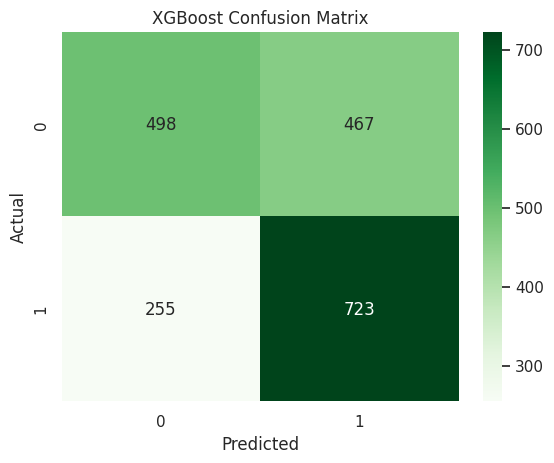

In [40]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


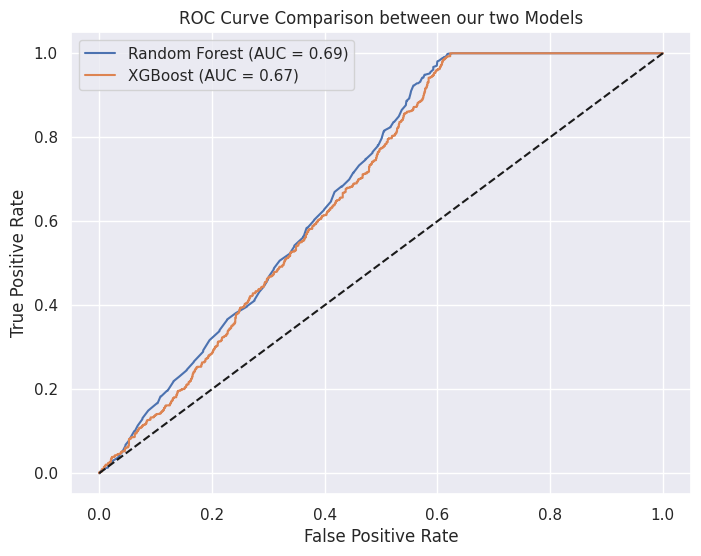

In [41]:

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison between our two Models")
plt.legend()
plt.show()

In [54]:
# Example encoded row (same columns you used for training)
input_data = {
    'Age': 9,
    'Gender': 1,  # Female
    'Avg_Daily_Screen_Time_hr': 6.5,
    'Primary_Device': 4,  # Smartphone 
    'Exceeded_Recommended_Limit': 0,
    'Educational_to_Recreational_Ratio': 0.33,
    'Urban_or_Rural': 1  # Urban
}

# Turn the dict into a dataframe
input_df = pd.DataFrame([input_data])

# Make prediction
pred = xgb_model.predict(input_df)[0]
prob = xgb_model.predict_proba(input_df)[0][1]

# Display output
print("Prediction:", "Poor Sleep" if pred == 1 else "No Poor Sleep")
print(f"Confidence: {prob * 100:.2f}%")

Prediction: Poor Sleep
Confidence: 71.21%


In [ ]:
import joblib

# Save
joblib.dump(xgb_model, 'xgb_model.pkl')

# Load later
xgb_model = joblib.load('xgb_model.pkl')
